In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [129]:
stock=pd.read_csv("stocks.csv")

In [130]:
stock.head(5)

,Date,AAPL,IBM,CSCO,MSFT
0,2000-01-03,111.937502,116.0000,108.0625,116.5625
1,2000-01-04,102.500003,112.0625,102.0000,112.6250
2,2000-01-05,103.999997,116.0000,101.6875,113.8125
3,2000-01-06,94.999998,114.0000,100.0000,110.0000
4,2000-01-07,99.500001,113.5000,105.8750,111.4375


In [131]:
aapl=stock["AAPL"]
ibm=stock["IBM"]
csco=stock["CSCO"]
msft=stock["MSFT"]

In [132]:
# Multiple time series on common axes
# For this exercise, you will construct a plot showing four time series stocks on the same axes. 
# The time series in question are represented in the session using the identifiers aapl, ibm, csco, and msft. 
# You'll generate a single plot showing all the time series on common axes with a legend.

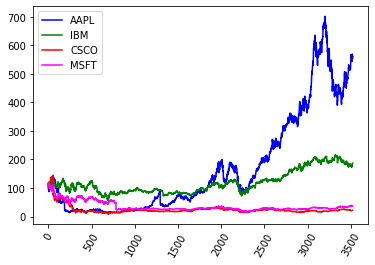

In [133]:
import matplotlib.pyplot as plt
# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()


In [135]:
# # set the date-time index

# stock.index = pd.to_datetime(stock.index)
# stock=stock.set_index(stock.index)
# # type(stock)
# type(stock.index)

stock.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3521 non-null   object 
 1   AAPL    3521 non-null   float64
 2   IBM     3521 non-null   float64
 3   CSCO    3521 non-null   float64
 4   MSFT    3521 non-null   float64
dtypes: float64(4), object(1)
memory usage: 137.7+ KB


In [136]:
stock["Date_Format"]=pd.to_datetime(stock.Date)
stock.dtypes

Date                   object
AAPL                  float64
IBM                   float64
CSCO                  float64
MSFT                  float64
Date_Format    datetime64[ns]
dtype: object

In [137]:
stock.set_index("Date_Format",inplace=True)
stock.dtypes

Date     object
AAPL    float64
IBM     float64
CSCO    float64
MSFT    float64
dtype: object

In [138]:
# type(stock.index)
stock = stock.drop("Date", axis=1)
stock.head(5)

,AAPL,IBM,CSCO,MSFT
Date_Format,,,,
2000-01-03,111.937502,116.0000,108.0625,116.5625
2000-01-04,102.500003,112.0625,102.0000,112.6250
2000-01-05,103.999997,116.0000,101.6875,113.8125
2000-01-06,94.999998,114.0000,100.0000,110.0000
2000-01-07,99.500001,113.5000,105.8750,111.4375


In [139]:
type(stock.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [143]:
stock.loc['2001':'2007'].tail()

,AAPL,IBM,CSCO,MSFT
Date_Format,,,,
2007-12-24,198.799997,111.650002,28.719999,36.580002
2007-12-26,198.950001,111.559998,28.379999,36.610001
2007-12-27,198.570005,109.599998,27.790001,35.970001
2007-12-28,199.829994,110.089996,27.559999,36.119999
2007-12-31,198.079994,108.099998,27.070000,35.599998


In [ ]:
# Multiple time series slices (1)
# You can easily slice subsets corresponding to different time intervals from a time series. 
# In particular, you can use strings like '2001:2005', '2011-03:2011-12', or '2010-04-19:2010-04-30' 
# to extract data from time intervals of length 5 years, 10 months, or 12 days respectively.

# Unlike slicing from standard Python lists, tuples, and strings, when slicing time series by labels 
# (and other pandas Series & DataFrames by labels), the slice includes the right-most portion of the slice. 
# That is, extracting my_time_series['1990':'1995'] extracts data from my_time_series corresponding 
# to 1990, 1991, 1992, 1993, 1994, and 1995 inclusive.
# You can use partial strings or datetime objects for indexing and slicing from time series.

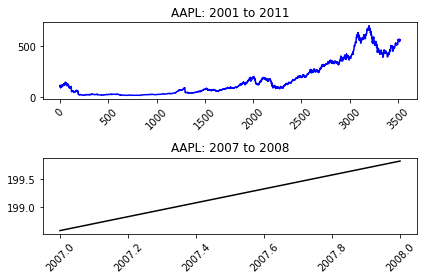

In [144]:
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl.loc['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color="black")
plt.tight_layout()
plt.show()


In [ ]:
# Multiple time series slices (2)
# In this exercise, you will use the same time series aapl from the previous exercise and plot tighter views of the data.

# Partial string indexing works without slicing as well. For instance, using my_time_series['1995'], my_time_series['1999-05'], 
# and my_time_series['2000-11-04'] respectively extracts views of the time series my_time_series corresponding to the entire year
# 1995, the entire month May 1999, and the entire day November 4, 2000.

KeyError: '2008-04'

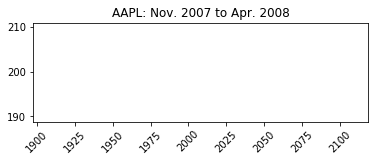

In [159]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view_1 = aapl.loc['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.plot(view_1,color="red")
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.xticks(rotation=45)

# Reassign the series by slicing the month January 2008
view_2= aapl.loc['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.plot(view_2,color="green")
plt.xticks(rotation=45)
plt.title('AAPL: Jan. 2008')


# Improve spacing and display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Plotting an inset view
# Remember, rather than comparing plots with subplots or overlayed plots, you can generate an inset view directly using plt.axes()
# . In this exercise, you'll reproduce two of the time series plots from the preceding two exercises. Your figure will contain 
# an inset plot to highlight the dramatic changes in AAPL stock price between November 2007 and April 2008 
# (as compared to the 11 years from 2001 to 2011).

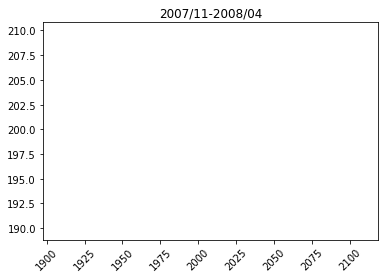

In [157]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl.loc['2007-11':'2008-04']
# Plot the entire series 
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25,0.5,0.35,0.35])

# Plot the sliced series in red using the current axes
plt.plot(view,color="red")
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()



In [ ]:
# Plotting moving averages
# In this exercise, you will plot pre-computed moving averages of AAPL stock prices in distinct subplots.

# The time series aapl is overlayed in black in each subplot for comparison.
# The time series mean_30, mean_75, mean_125, and mean_250 have been computed for you 
# (containing the windowed averages of the series aapl computed over windows of width 30 days, 75 days, 125 days, and 250 days
#  respectively).

NameError: name 'mean_30' is not defined

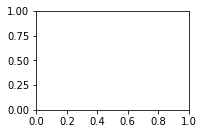

In [161]:
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(mean_30, color='green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(mean_75, color='red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125, color='magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2, 2,4)
plt.plot(mean_250, color='cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.show()


In [ ]:
# Plotting moving standard deviations
# Having plotted pre-computed moving averages of AAPL stock prices on distinct subplots in the previous exercise, 
# you will now plot pre-computed moving standard deviations of the same stock prices, this time together on common axes.

# The time series aapl is not plotted in this case; it is of a different length scale than the standard deviations.
# The time series std_30, std_75, stdn_125, & std_250 have been computed for you 
# (containing the windowed standard deviations of the series aapl computed over windows of width 30 days, 75 days, 125 days, & 250 days respectively).

In [162]:
# Plot std_30 in red
plt.plot(std_30, color="red", label='30d')

# Plot std_75 in cyan
plt.plot(std_75, color="cyan", label='75d')

# Plot std_125 in green
plt.plot(std_125, color="green", label='125d')

# Plot std_250 in magenta
plt.plot(std_250, color="magenta", label='250d')

# Add a legend to the upper left
plt.legend(loc="upper left")

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()


NameError: name 'std_30' is not defined